# 첫번째 머신러닝 만들기 (생선분류 문제)

## 도미 데이터

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

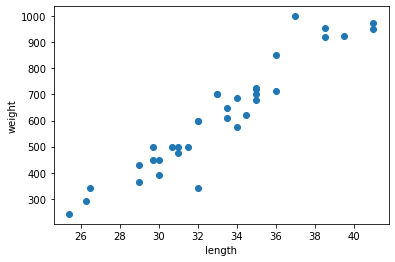

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 빙어 데이터와 함께 그리기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

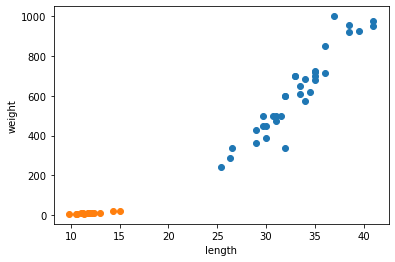

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 분류 모델을 만들자!

### 49 by 2 의 행렬 만들기 (세로 방향으로 늘어뜨린 2차원 리스트 생성)

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[x, y] for x, y in zip(length,weight)]

### 데이터 정답지 만들기 (도미는 1, 빙어는 0)

In [6]:
fish_target = [1]*35 + [0]*14

### sklearn 사용하기! (KNN - K최근접 이웃)
#### 어떤 데이터를 판단할 때, 주위의 데이터를 보고 해당 데이터를 판단하는 모델
#### 주변 데이터와 직선 거리 계산 -> 데이터 많으면 잘 안 됨

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#### fit을 통해 훈련

In [20]:
kn = KNeighborsClassifier() ## class
kn.fit(fish_data, fish_target) ## fit 같은 것은 함수(변수)

KNeighborsClassifier()

#### 모델 평가 (1에 가까울 수록 정확도 높은 것)

In [11]:
kn.score(fish_data, fish_target)

## score는 원래 test data 넣어서 정확도 보는 것인데, 이건 train data 그대로 넣었으니 당연히 1

1.0

#### 예측하기!

In [14]:
kn.predict([[30, 600]])

array([1])

#### 넣었던 데이터 확인하기

In [19]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### - KNN은 사실 뭔가 훈련하는 모델은 아님. 단순히 데이터 정보를 저장하고 그 정보 내에서 가까운 데이터를 참고해서 값을 내는 모델일 뿐.
### - 몇개를 참고하는 지는 정할 수 있음. 기본값은 주변 5개 
### - kn49 = KNeighborClassfier(n_neighbors=49) -> 참고 데이터를 49개로 한 모델

In [24]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

#### >> 이 모델은 49개 전체를 비교군으로 삼았으니까 무엇을 넣더라도 아마 도미로 결과를 내뱉을 것임 (도미가 더 많으니까)

In [26]:
kn49.predict([[10,7]])

array([1])

## 훈련데이터와 테스트데이터 나누기!

In [28]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [31]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 왜 0일까? train 데이터에 도미만 있어서! -> 데이터가 고루 섞여 있어야함 

### Numpy를 활용하여 섞어보자!

In [32]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [37]:
# seed 설정해줘야 seed 기준 유사 난수를 만들어 줌
np.random.seed(42)

index = np.arange(49)
np.random.shuffle(index)

In [41]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

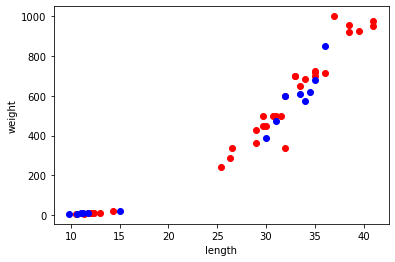

In [47]:
plt.scatter(train_input[:,0], train_input[:,1], c="red")
plt.scatter(test_input[:,0], test_input[:,1], c="blue")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [48]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0